In [1]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 43kB/s 
     |████████████████████████████████| 501kB 41.9MB/s 
     |████████████████████████████████| 3.1MB 35.6MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


In [3]:
print(tf.__version__)

2.0.0-beta1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [0]:
!head '/content/spam.csv'

UnicodeDecodeError: ignored

In [7]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# rename columns to something better
df.columns = ['labels', 'data']

In [11]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham' :0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
# Split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test) 

In [15]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7259 unique tokens.


In [16]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [19]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [0]:
# Create the model

# We get to choose embedding dimensionality 
D = 20

# Hidden state dimensionality 
M = 15

# Note: we actually want to the size of the embedding to (V+1) x D,
# because the first index starts from 1 and not 0
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [21]:
# Compile and fit 
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],
)

print('Training model ......')

r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
)


Training model ......
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 13s 3ms/sample - loss: 0.4724 - accuracy: 0.8470 - val_loss: 0.4131 - val_accuracy: 0.8554
Epoch 2/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.3727 - accuracy: 0.8711 - val_loss: 0.3746 - val_accuracy: 0.8554
Epoch 3/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.2792 - accuracy: 0.8711 - val_loss: 0.2380 - val_accuracy: 0.8554
Epoch 4/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.1704 - accuracy: 0.9325 - val_loss: 0.1641 - val_accuracy: 0.9608
Epoch 5/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.1101 - accuracy: 0.9885 - val_loss: 0.1194 - val_accuracy: 0.9755
Epoch 6/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.0695 - accuracy: 0.9

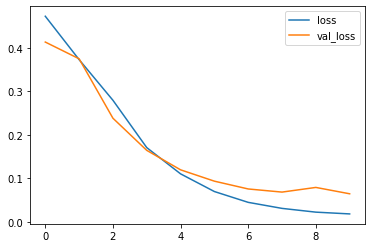

In [22]:
# Plot per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()